# HomeWork 9
**DeadLine : 23:59 1 Khordad 1400**

# Time Series Prediction

Due to the sequential charasteristics of RNNs, they can be used for time series prediction task. A time series is a series of data points indexed in time order. One example of time series is stock prices at regular intervals of time (hourly, daily, etc.). There have been many attempts to forecast stocks market, some belive predicting the market is impossible because of its total random behaviour, while some (mainly stocks technical analysts) belive not 100% accurate, but it is partly predictable, as they say "history repeats itself" (this phrase indicates that there might be some repetitive patterns in market's behaviour). 

In this practice, we are going to discover ourselves whether it is possible or not, whether we are going to be rich or broke :)  

## Stocks Prediction Using LSTM

LSTMs can be used for modeling time series (such as stocks market) as they are capable of remembering past information. Stock price prediction is similar to any other machine learning problem where we are given a set of features and we have to predict a corresponding value, in this case our features are the closing prices of stocks in the past 60 days and we want to predict next closing price. We can use LSTM to model this 60 days sequence by a hidden state as we do in all other sequence modeling problems:

<p align="center"><img src="https://drive.google.com/thumbnail?id=1hml7fG9_GKDLH1068Wq_Jk-D09FtQk17&sz=w1000-h1000" width="800"/></p>

</br>

We are going to solve predicting the exact price problem at time $T_i$ given prices at times $T_{i-60}$, ..., $T_{i-1}$


### Predicting The Exact Price

**DATA:**

The data that we are going to use are from ***Yahoo Finance*** (a place to look up stock market data and company news). We can accsess historical market data from *Yahoo Finance* using python ***yfinance*** module. 

Install *yfinance* module:

In [1]:
from IPython.display import clear_output

!pip install yfinance

clear_output()

For training our algorithm, we will be using the Apple stock prices from 1st January 2014 to 1st January 2018. In order to evaluate the performance of the algorithm, we will be using the prices from 1st January 2018 to 1st January 2019. 

Getting the data and visualise it:

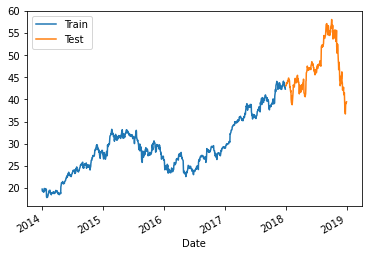

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  41.310070  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  41.302879  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  41.494736   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.967163   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.811283   82271200
...               ...        ...        ...        ...        ...        ...
2018-12-24  37.037498  37.887501  36.647499  36.707500  35.740280  148676800
2018-12-26  37.075001  39.307499  36.680000  39.292500  38.257172  234330000
2018-12-27  38.959999  39.192501  37.517502  39.037498  38.008892  212468400
2018-12-28  39.375000  39.630001  38.637501  39.057499  38.028370  169165600
2018-12-31  39.632500  39.840000  39.119999  39.435001  38.395920  140014000

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf  

train_data = yf.download('AAPL','2014-01-01','2018-01-01')
test_data = yf.download('AAPL','2018-01-01','2019-01-01')

train_data.Close.plot()
test_data.Close.plot()
plt.legend (["Train", "Test"])
clear_output()
plt.show()
print(test_data)

As you can see our data is just a sequence of numbers ordered by time. 

In order to normalize our data we scale them between 0 and 1: 

In [3]:
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
scaler = MinMaxScaler(feature_range = (0, 1)).fit(train_data.Close.values.reshape(-1, 1))

train_scaled = scaler.transform(train_data.Close.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.Close.values.reshape(-1, 1))  

train_scaled__ = scaler.transform(train_data.values.reshape(-1, 1))
test_scaled__ = scaler.transform(test_data.values.reshape(-1, 1))  

print("train_scaled :", train_scaled.shape)
print("test_scaled  :", test_scaled.shape)
print("train_scaled__",train_scaled__.shape)
print("test_scaled__",test_scaled__.shape)



train_scaled : (1007, 1)
test_scaled  : (251, 1)
train_scaled__ (6042, 1)
test_scaled__ (1506, 1)


Create input output pairs from sequence:

> Indented block



In [4]:
x_train = np.zeros((train_scaled.shape[0]-60, 60))  
y_train = np.zeros(train_scaled.shape[0]-60)
for i in range(train_scaled.shape[0]-60):  
    x_train[i] = train_scaled[i:i+60, 0]
    y_train[i] = train_scaled[i+60, 0]
   # print(i)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
print(y_train.shape)

(947, 60, 1)
(947,)


Create and train a model with LSTM layers:

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout 
model = None

########################################
#     Put your implementation here     #
######################################## 

model = Sequential()
model.add(LSTM(units=100,  input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(LSTM(units=70, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.4))
model.add(LSTM(units=40))  
model.add(Dropout(0.4))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x_train, y_train, epochs = 80, batch_size = 40)

Epoch 1/80
24/24 [==============================] - 10s 140ms/step - loss: 0.1071
Epoch 2/80
24/24 [==============================] - 3s 139ms/step - loss: 0.0127
Epoch 3/80
24/24 [==============================] - 3s 139ms/step - loss: 0.0093
Epoch 4/80
24/24 [==============================] - 3s 137ms/step - loss: 0.0087
Epoch 5/80
24/24 [==============================] - 3s 140ms/step - loss: 0.0075
Epoch 6/80
24/24 [==============================] - 3s 138ms/step - loss: 0.0087
Epoch 7/80
24/24 [==============================] - 3s 137ms/step - loss: 0.0074
Epoch 8/80
24/24 [==============================] - 3s 138ms/step - loss: 0.0093
Epoch 9/80
24/24 [==============================] - 3s 138ms/step - loss: 0.0079
Epoch 10/80
24/24 [==============================] - 3s 137ms/step - loss: 0.0074
Epoch 11/80
24/24 [==============================] - 3s 139ms/step - loss: 0.0075
Epoch 12/80
24/24 [==============================] - 3s 138ms/step - loss: 0.0061
Epoch 13/80
24/24 [=====

Create test features set similar to training set:

In [6]:
########################################
#     Put your implementation here     #
######################################## 


test_scaled = scaler.transform(test_data.Close.values.reshape(-1, 1))  

x_test = np.zeros((test_scaled.shape[0]-60, 60))  
for i in range(test_scaled.shape[0]-60):  
    x_test[i] = test_scaled[i:i+60, 0]

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_test.shape)


(191, 60, 1)


And finaly let's see the results:

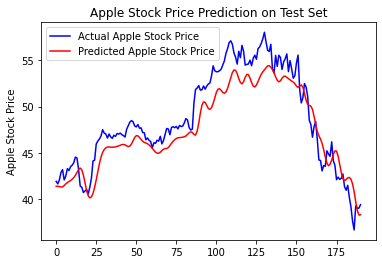

In [7]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  

plt.plot(test_data.Close.values[60:], color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction on Test Set')    
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()